<b>the project is dedicated to analyzing people's music taste and predicting its effects on their mental health</b>\
the data was taken here: https://www.kaggle.com/datasets/catherinerasgaitis/mxmh-survey-results/data \
some info about the data:

the columns are:


['Timestamp']\
['Age']\
['Primary streaming service']\
['Hours per day']\
['While working']\
['Instrumentalist']\
['Composer']\
['Fav genre']\
['Exploratory']\
['Foreign languages']\
['BPM']\
['Frequency [Classical]']\
['Frequency [Country]']\
['Frequency [EDM]']\
['Frequency [Folk]']\
['Frequency [Gospel]']\
['Frequency [Hip hop]']\
['Frequency [Jazz]']\
['Frequency [K pop]']\
['Frequency [Latin]']\
['Frequency [Lofi]']\
['Frequency [Metal]']\
['Frequency [Pop]']\
['Frequency [R&B]']\
['Frequency [Rap]']\
['Frequency [Rock]']\
['Frequency [Video game music]']\
['Anxiety']\
['Depression']\
['Insomnia']\
['OCD']\
['Music effects']\
['Permissions']]


firstly, lets upload the data

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('/content/drive/My Drive/mxmh_survey_results.csv', low_memory = False)
df.head()

,Timestamp,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,...,Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Permissions
0,8/27/2022 19:29:02,18.0,Spotify,3.0,Yes,Yes,Yes,Latin,Yes,Yes,...,Sometimes,Very frequently,Never,Sometimes,3.0,0.0,1.0,0.0,NaN,I understand.
1,8/27/2022 19:57:31,63.0,Pandora,1.5,Yes,No,No,Rock,Yes,No,...,Sometimes,Rarely,Very frequently,Rarely,7.0,2.0,2.0,1.0,NaN,I understand.
2,8/27/2022 21:28:18,18.0,Spotify,4.0,No,No,No,Video game music,No,Yes,...,Never,Rarely,Rarely,Very frequently,7.0,7.0,10.0,2.0,No effect,I understand.
3,8/27/2022 21:40:40,61.0,YouTube Music,2.5,Yes,No,Yes,Jazz,Yes,Yes,...,Sometimes,Never,Never,Never,9.0,7.0,3.0,3.0,Improve,I understand.
4,8/27/2022 21:54:47,18.0,Spotify,4.0,Yes,No,No,R&B,Yes,No,...,Very frequently,Very frequently,Never,Rarely,7.0,2.0,5.0,9.0,Improve,I understand.


let's count the length of dataset

In [5]:
len(df)

736

the next step is making the data usable by gettig rid of all the "trash"\
i am not deleting everything in the same row\
baecause it will help me to copypast all the columns later

In [6]:
df = df.dropna()

let's count the lenght again to see how much data we deleted

In [7]:
len(df)

616

groupping all people in 4 age groups: <18, 18-34, 35-59, >60

In [8]:
df_age_group_1 = df.loc[(df['Age'] >= 0) & (df['Age'] < 18)]
df_age_group_2 = df.loc[(df['Age'] >= 18) & (df['Age'] < 35)]
df_age_group_3 = df.loc[(df['Age'] >= 35) & (df['Age'] < 56)]
df_age_group_4 = df.loc[df['Age'] >= 56]

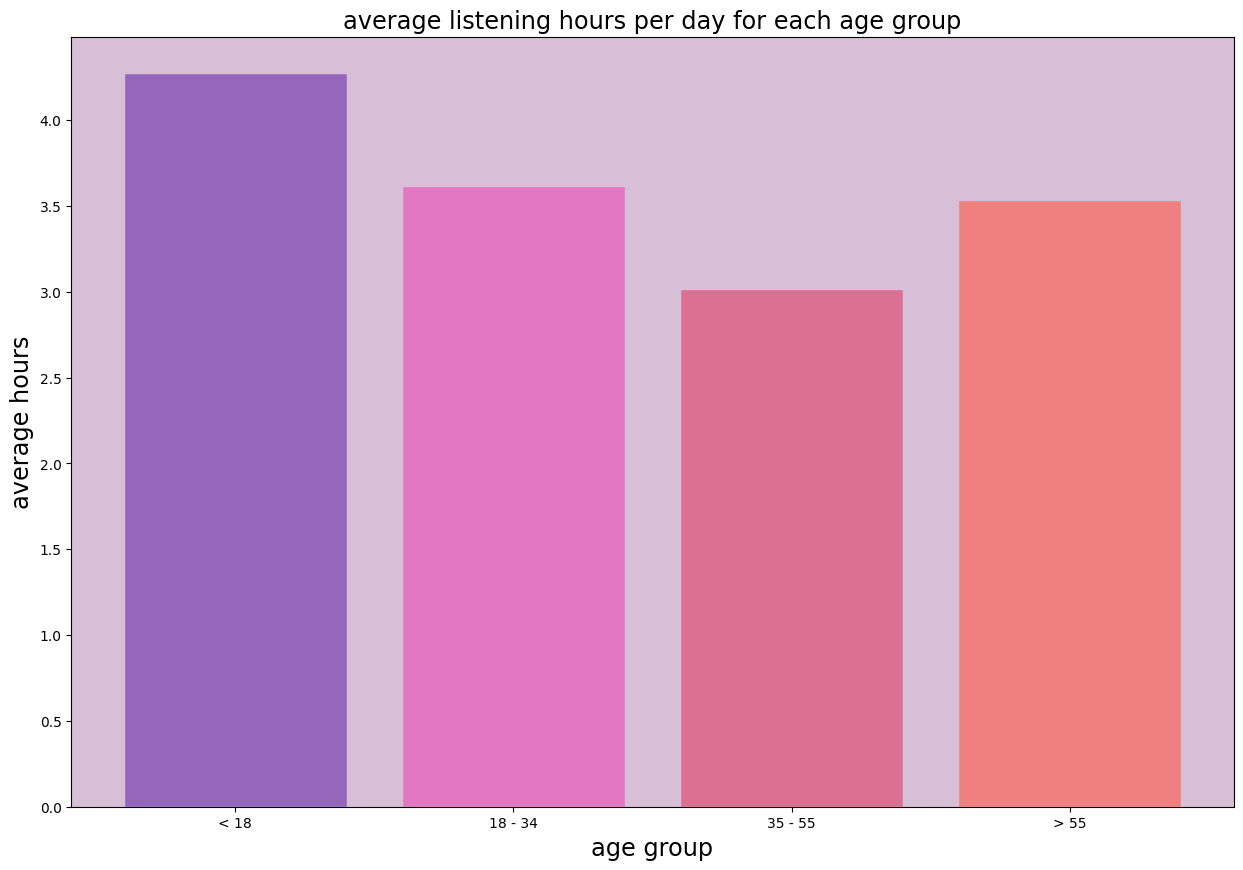

In [9]:
group_1_time = df_age_group_1['Hours per day'].mean()
group_2_time = df_age_group_2['Hours per day'].mean()
group_3_time = df_age_group_3['Hours per day'].mean()
group_4_time = df_age_group_4['Hours per day'].mean()
color = ['tab:purple', 'tab:pink', 'palevioletred', 'lightcoral']
plt.figure(figsize = (15, 10))

x = ["< 18", "18 - 34", "35 - 55", "> 55"]
y = [group_1_time, group_2_time, group_3_time, group_4_time]
ax = plt.gca()
ax.set_facecolor('thistle')
ax.bar(x, y, color = color, edgecolor = 'thistle')
plt.title('average listening hours per day for each age group', size = "xx-large")
plt.xlabel('age group', size = 'xx-large')
plt.ylabel('average hours', size = 'xx-large')

plt.show()

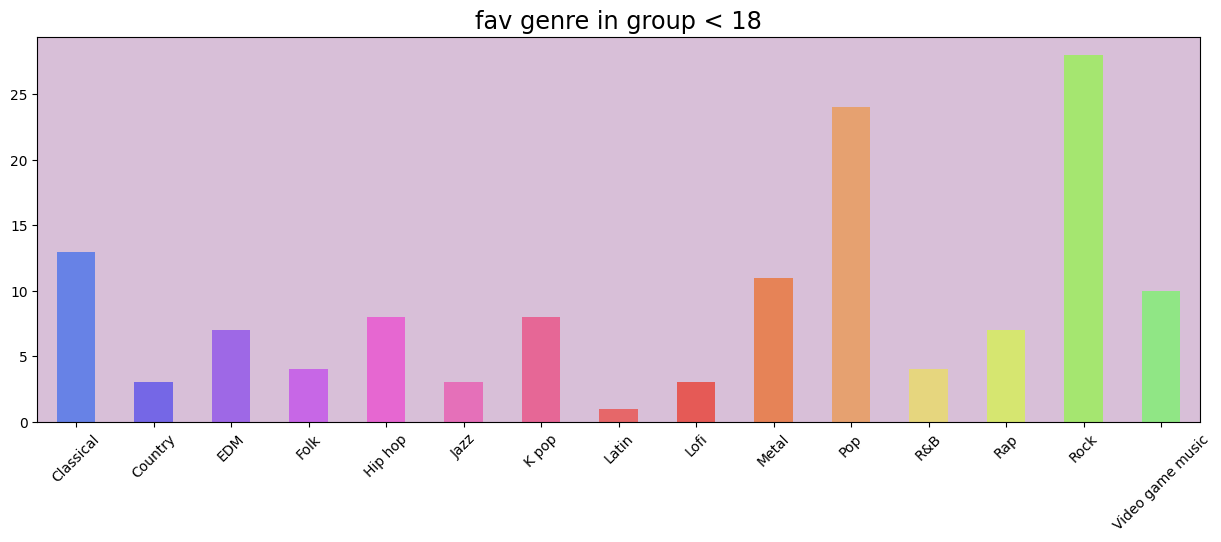

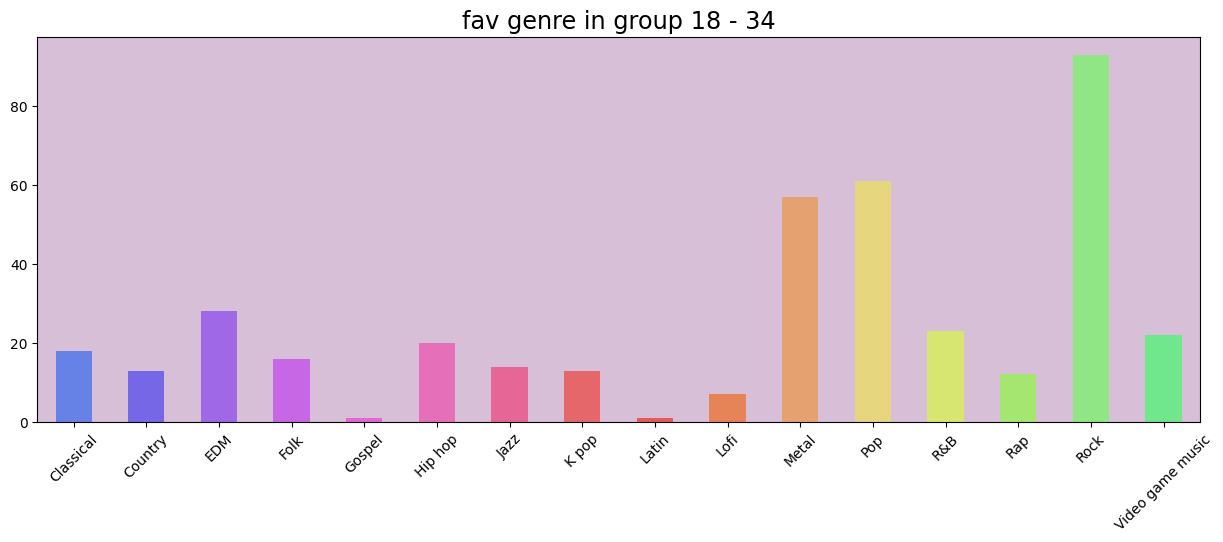

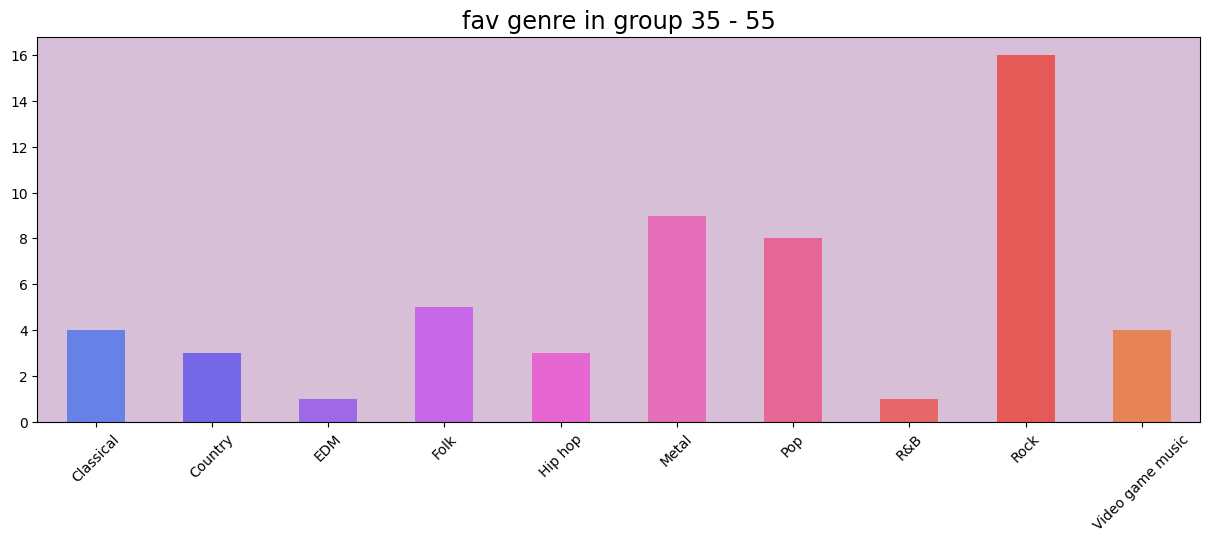

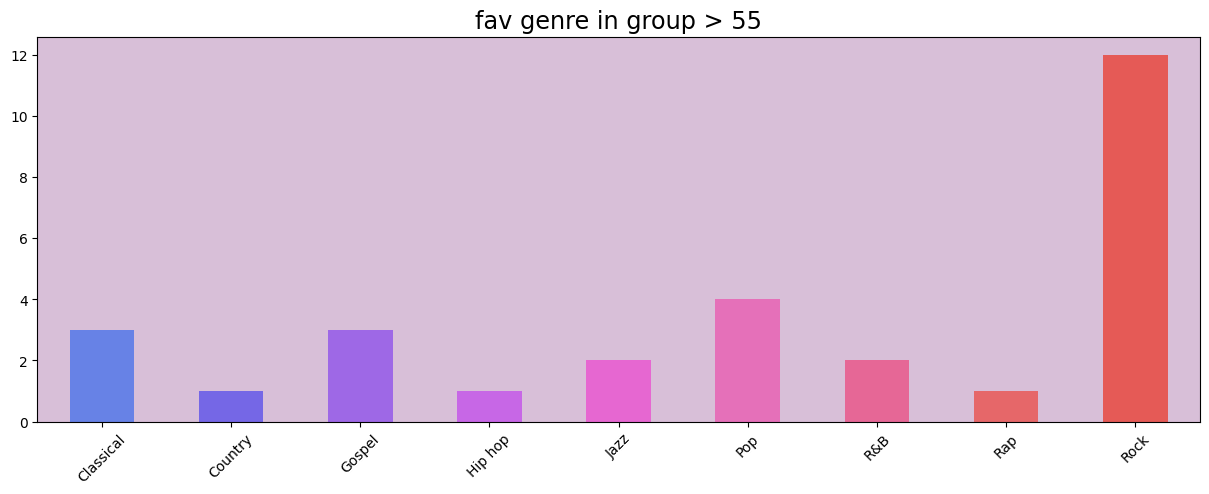

In [10]:
color = ['#6782E6','#7567E6', '#9E68E6', '#C767E6', '#E667D1', '#E570B9', '#E66796', '#E66769', '#E55A56', '#E68357', '#E6A170', '#E6D67E', '#D6E670', '#A5E670', '#90E685', '#70E68D']

plt.figure(figsize = (15, 5))

group_1_genre = df_age_group_1.groupby('Fav genre').size().plot(kind = 'bar', color = color, label = '', xlabel = '')

plt.title('fav genre in group < 18', size = 'xx-large')
ax = plt.gca()
ax.set_facecolor('thistle')
plt.xticks(rotation = 45)

plt.show()

plt.figure(figsize = (15, 5))

group_2_genre = df_age_group_2.groupby('Fav genre').size().plot(kind = 'bar', color = color, label = '', xlabel = '')

plt.title('fav genre in group 18 - 34', size = 'xx-large')
ax = plt.gca()
ax.set_facecolor('thistle')
plt.xticks(rotation = 45)

plt.show()


plt.figure(figsize = (15, 5))

group_3_genre = df_age_group_3.groupby('Fav genre').size().plot(kind = 'bar', color = color, label = '', xlabel = '')

plt.title('fav genre in group 35 - 55', size = 'xx-large')
ax = plt.gca()
ax.set_facecolor('thistle')
plt.xticks(rotation = 45)

plt.show()


plt.figure(figsize = (15, 5))

group_4_genre = df_age_group_4.groupby('Fav genre').size().plot(kind = 'bar', color = color, label = '', xlabel = '')

plt.title('fav genre in group > 55', size = 'xx-large')
ax = plt.gca()
ax.set_facecolor('thistle')
plt.xticks(rotation = 45)

plt.show()

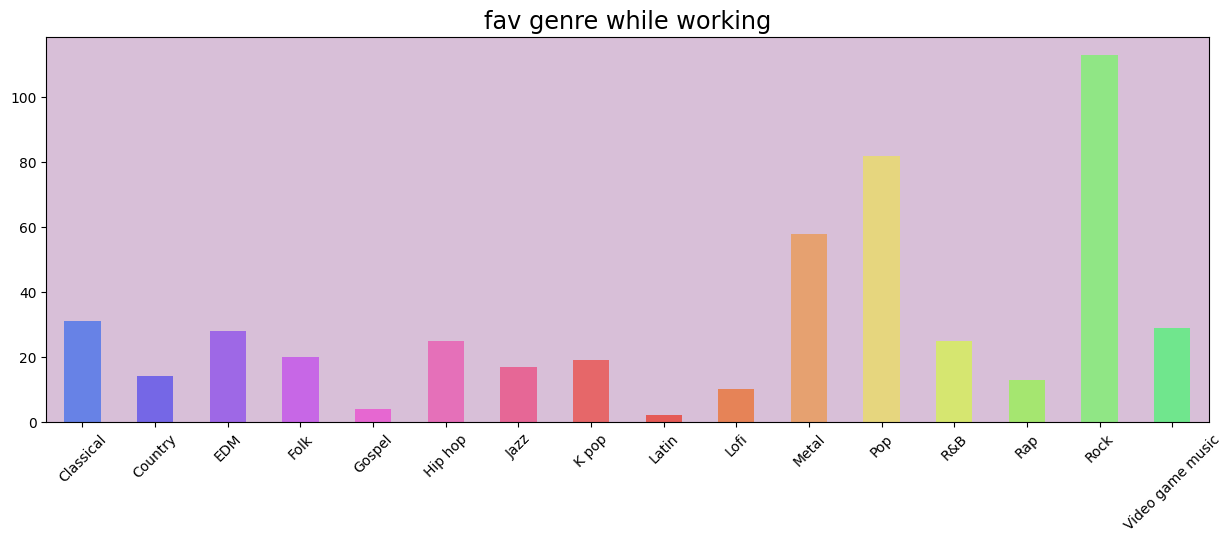

In [13]:
df_no = df.loc[(df['While working'] == 'No')]
df_yes = df.loc[(df['While working'] == 'Yes')]

color = ['#6782E6','#7567E6', '#9E68E6', '#C767E6', '#E667D1', '#E570B9', '#E66796', '#E66769', '#E55A56', '#E68357', '#E6A170', '#E6D67E', '#D6E670', '#A5E670', '#90E685', '#70E68D']

plt.figure(figsize = (15, 5))

group_yes = df_yes.groupby('Fav genre').size().plot(kind = 'bar', color = color, label = '', xlabel = '')

plt.title('fav genre while working', size = 'xx-large')
ax = plt.gca()
ax.set_facecolor('thistle')
plt.xticks(rotation = 45)

plt.show()

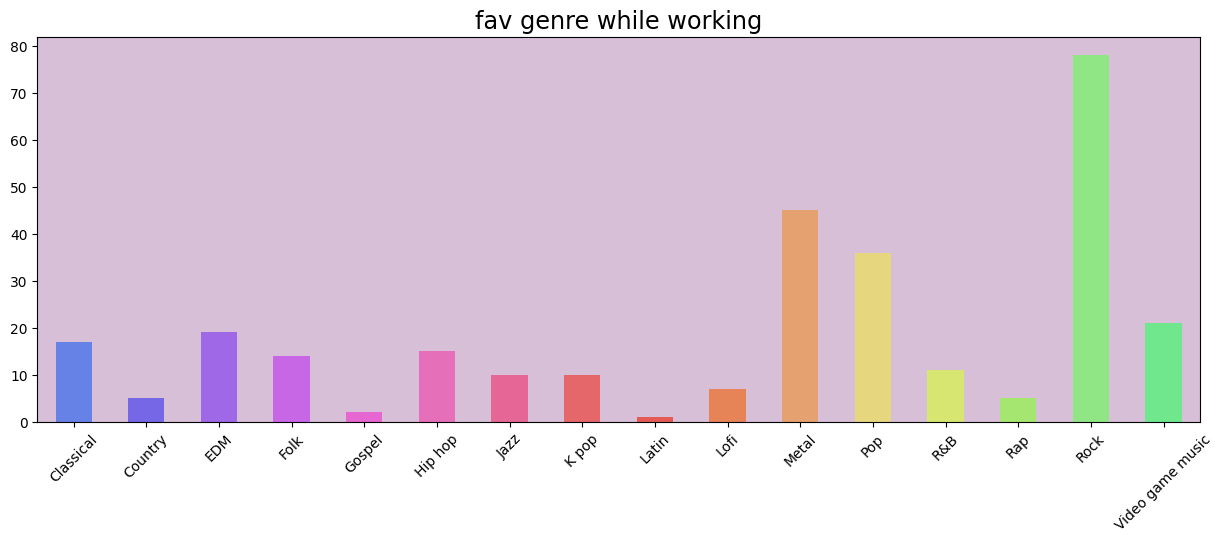

In [14]:
df_ins = df.loc[(df['Insomnia'] >=4)]

color = ['#6782E6','#7567E6', '#9E68E6', '#C767E6', '#E667D1', '#E570B9', '#E66796', '#E66769', '#E55A56', '#E68357', '#E6A170', '#E6D67E', '#D6E670', '#A5E670', '#90E685', '#70E68D']

plt.figure(figsize = (15, 5))

group_ins= df_ins.groupby('Fav genre').size().plot(kind = 'bar', color = color, label = '', xlabel = '')

plt.title('fav genre while working', size = 'xx-large')
ax = plt.gca()
ax.set_facecolor('thistle')
plt.xticks(rotation = 45)

plt.show()

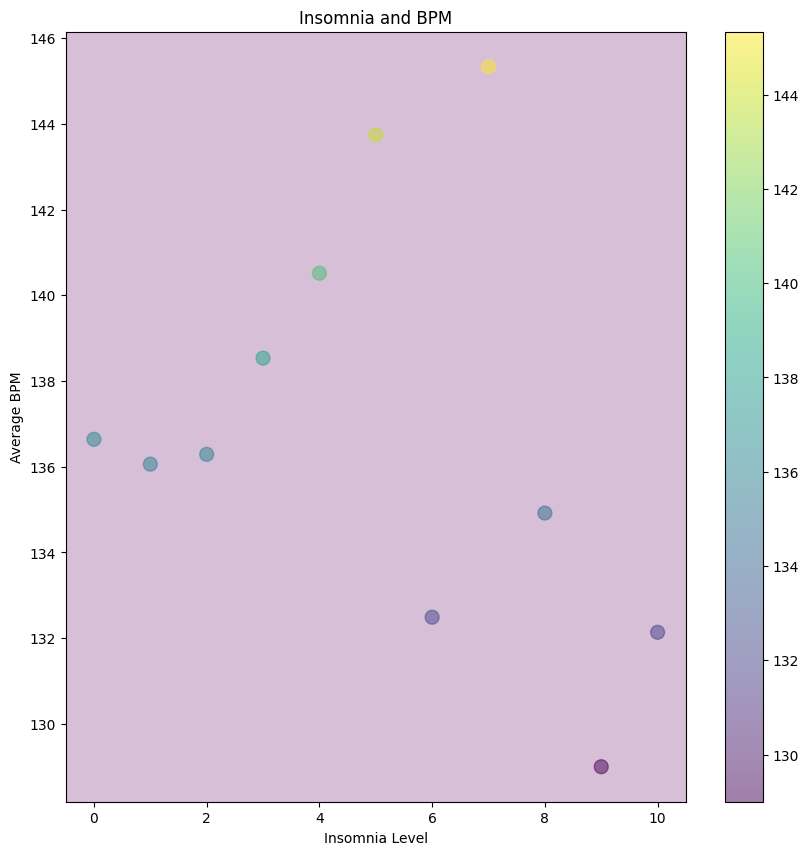

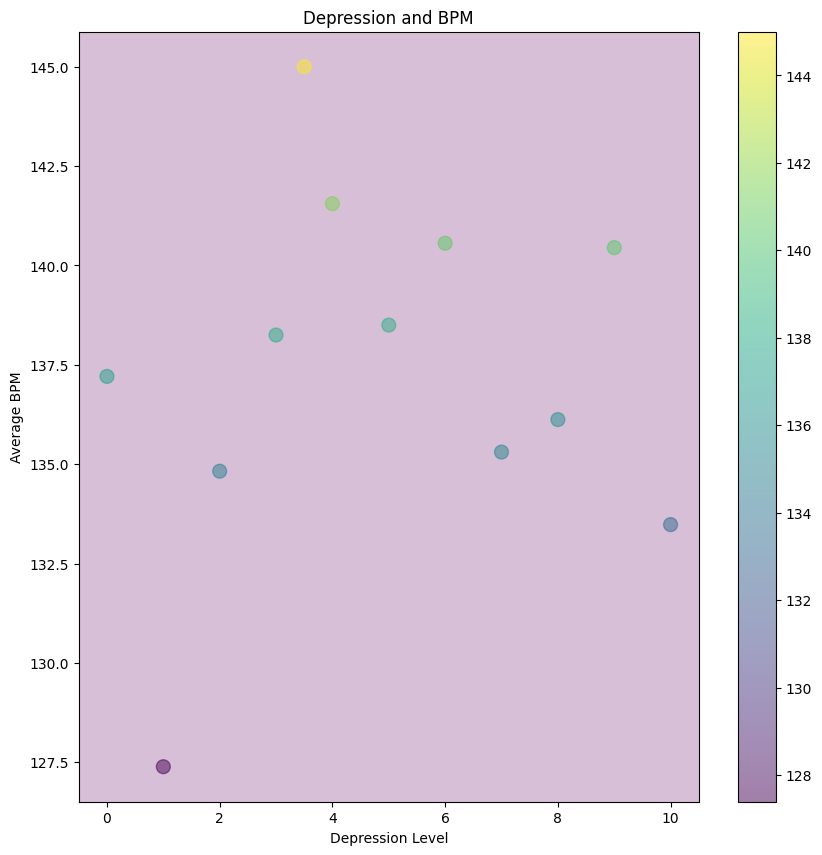

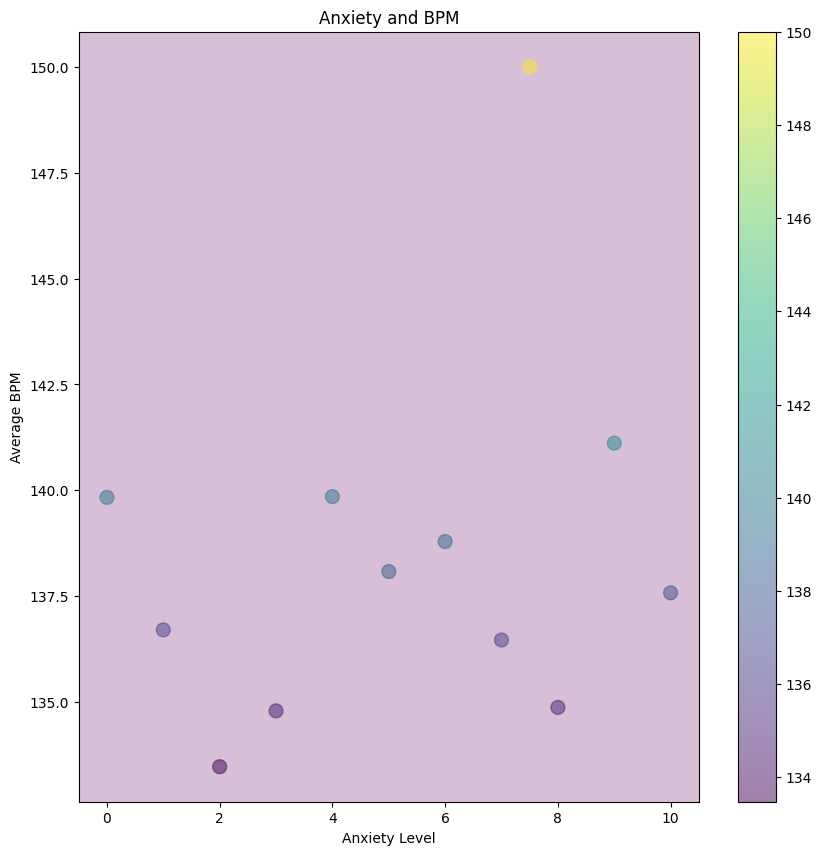

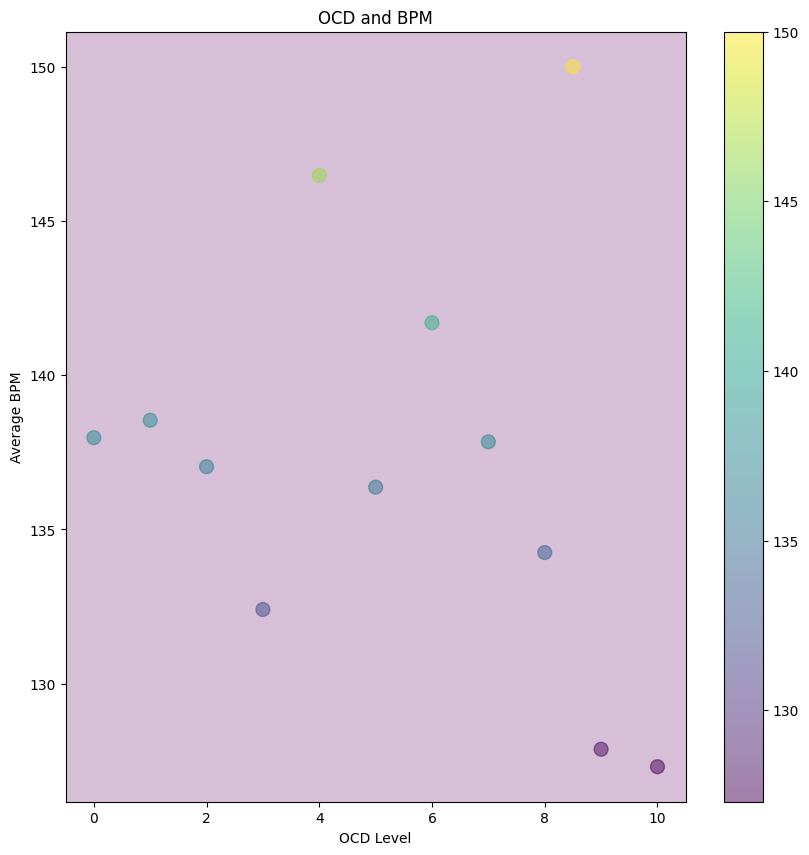

In [25]:
df_ins0 = df.loc[(df['Insomnia'] == 0)]
df_ins1 = df.loc[(df['Insomnia'] == 1)]
df_ins2 = df.loc[(df['Insomnia'] == 2)]
df_ins3 = df.loc[(df['Insomnia'] == 3)]
df_ins4 = df.loc[(df['Insomnia'] == 4)]
df_ins5 = df.loc[(df['Insomnia'] == 5)]
df_ins6 = df.loc[(df['Insomnia'] == 6)]
df_ins7 = df.loc[(df['Insomnia'] == 7)]
df_ins8 = df.loc[(df['Insomnia'] == 8)]
df_ins9 = df.loc[(df['Insomnia'] == 9)]
df_ins10 = df.loc[(df['Insomnia'] == 10)]

df = df.loc[(df['BPM'] < 500)]
df = df.loc[(df['BPM'] > 50)]
#group_ins1 = df_ins1.groupby('BPM').mean().plot(kind = 'bar', color = color, label = '', xlabel = '')
gr = df.groupby('Insomnia')['BPM'].mean().reset_index()
plt.figure(figsize=(10,10))
ax = plt.gca()
ax.set_facecolor('thistle')
plt.scatter(gr['Insomnia'], gr['BPM'], c=gr['BPM'], s=100, alpha=0.5)
plt.colorbar()
plt.xlabel('Insomnia Level')
plt.ylabel('Average BPM')
plt.title('Insomnia and BPM')
plt.show()


gr = df.groupby('Depression')['BPM'].mean().reset_index()
plt.figure(figsize=(10,10))
ax = plt.gca()
ax.set_facecolor('thistle')
plt.scatter(gr['Depression'], gr['BPM'], c=gr['BPM'], s=100, alpha=0.5)
plt.colorbar()
plt.xlabel('Depression Level')
plt.ylabel('Average BPM')
plt.title('Depression and BPM')
plt.show()


gr = df.groupby('Anxiety')['BPM'].mean().reset_index()
plt.figure(figsize=(10,10))
ax = plt.gca()
ax.set_facecolor('thistle')
plt.scatter(gr['Anxiety'], gr['BPM'], c=gr['BPM'], s=100, alpha=0.5)
plt.colorbar()
plt.xlabel('Anxiety Level')
plt.ylabel('Average BPM')
plt.title('Anxiety and BPM')
plt.show()


gr = df.groupby('OCD')['BPM'].mean().reset_index()
plt.figure(figsize=(10,10))
ax = plt.gca()
ax.set_facecolor('thistle')
plt.scatter(gr['OCD'], gr['BPM'], c=gr['BPM'], s=100, alpha=0.5)
plt.colorbar()
plt.xlabel('OCD Level')
plt.ylabel('Average BPM')
plt.title('OCD and BPM')
plt.show()